In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as sl

In [24]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price', 'rooms', 'dealer', 'district'], na_values=['Zapytajocenę'])

In [25]:
df = df.dropna()

In [26]:
q = df["meters"].quantile(0.99)

In [27]:
df = df[df["meters"] < q]

In [28]:
q = df["price"].quantile(0.99)

In [29]:
df = df[df["price"] < q]

In [30]:
df.rooms = df.rooms.astype(int)

In [38]:
x_axis = np.array([df.meters]).reshape(-1, 1)
y_axis = np.array(df.price.tolist())


regresja = sl.LinearRegression()

regresja.fit(x_axis, y_axis)

regresja = sl.LinearRegression()

regresja.fit(x_axis, y_axis)
print('Wyraz wolny jest równy: %s' % np.round(regresja.intercept_, 30))
print('Współczynnik kierunkowy wynosi: %s' % np.round(regresja.coef_, 30))
print('Współczynnik dopasowania wynosi: %s' % np.round(regresja.score(x_axis, y_axis),30))



Wyraz wolny jest równy: 67914.45358908956
Współczynnik kierunkowy wynosi: [4765.3236321]
Współczynnik dopasowania wynosi: 0.6977939055995422


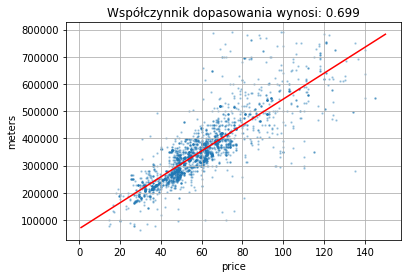

In [69]:
P = np.array([4765.3236321 * x + 67914.45358908956 for x in np.linspace(1, 150, 100)])

fig = plt.figure()
plt.scatter(x_axis, y_axis, s=1.9, alpha=0.3)
plt.plot(np.linspace(1, 150, 100), P, c='r')
plt.xlabel('price')
plt.ylabel('meters')
plt.title('Współczynnik dopasowania wynosi: 0.699')
plt.grid(True)
plt.show()
fig.savefig('linear_regression.pdf')

In [47]:
X_new = [[30]]

In [76]:
model = regresja.predict(X_new)
print("Mieszkanie {} m2 ma wartość {} zł".format(X_new[0][0], int(round(model[0]))))

Mieszkanie 30 m2 ma wartość 210874 zł
